# Exploratory Data Analysis for Income Classification Dataset

## Notes
- Author: John Enright
- Date: 11/19/2022

## Data
- Training data ``../census_income_learn.csv``
- Test data ``../census_income_test.csv``

In [56]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
# Load the data

train_data = pd.read_csv('../data/census_income_learn.csv', header=None)
test_data = pd.read_csv('../data/census_income_test.csv', header=None)

In [58]:
# Adding column names to the tables
# Retrieved from the ../data/census_income_metadata.txt file

column_names={
    0 : 'age',
    1 : 'class_of_work',
    2 : 'industry_code',
    3 : 'occupation_code',
    4 : 'education',
    5 : 'wage_per_hour',
    6 : 'enrolled_in_edu_inst_last_wk',
    7 : 'marital_status',
    8 : 'major_industry_code',
    9: 'major_occupation_code',
    10: 'race',
    11: 'hispanic_origin',
    12: 'sex',
    13: 'member_of_labor_union',
    14: 'reason_for_unemployment',
    15: 'full_or_part_time_employment_stat',
    16: 'capital_gains',
    17: 'capital_losses',
    18: 'dividends_from_stocks',
    19: 'tax_filer_status',
    20: 'region of previous residence',
    21: 'state_of_previous_residence',
    22: 'detailed_household_and_family_stat',
    23: 'detailed_household_summary_in_household',
    24: 'instance_weight',
    25: 'migration_code_change_in_msa',
    26: 'migration_code_change_in_reg',
    27: 'migration_code_move_within_reg',
    28: 'live_in_this_house_1_year_ago',
    29: 'migration_prev_res_in_sunbelt',
    30: 'num_persons_worked_for_employer',
    31: 'family_member_under_18',
    32: 'country_of_birth_father',
    33: 'country_of_birth_mother',
    34: 'country_of_birth_self',
    35: 'citizenship',
    36: 'own_business_or_self_employed',
    37: 'fill_inc_questionnaire_for_veterans_admin',
    38: 'veteran_benefits',
    39: 'weeks_worked_in_years',
    40: 'year',
    41: 'y'    
    }

df = train_data.rename(columns=column_names)
df_test = test_data.rename(columns=column_names)

In [59]:
df.head()

,age,class_of_work,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veteran_benefits,weeks_worked_in_years,year,y
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


## Data cleaning and formatting based on data type

In [60]:

# Categorize features based on data type (continous, categorical)
def label_columns(df, columns, label_encoding =False):
    temp_df = df.copy()
    for column in columns:
        # Defines these as categorical features
        temp_df[column] = temp_df[column].astype('category')
        
        if label_encoding == True:
            temp_df[column] = temp_df[column].cat.codes
            
    return temp_df

             

In [61]:
continuous_columns = ['age','wage_per_hour','capital_gains','capital_losses',
                      'dividends_from_stocks','num_persons_worked_for_employer',
                      'instance_weight','weeks_worked_in_year',
                      'education','detailed_household_and_family_stat']

categorical_columns = list(set(df.columns) - set(continuous_columns))
df_cat = label_columns(df,categorical_columns)         

In [62]:
X_train = label_columns(df, categorical_columns, label_encoding=True)
X_test = label_columns(df_test, categorical_columns, label_encoding=True)

In [ ]:
y_train = X_train.pop('y')
y_test = X_test.pop('y')
train_counts=y_train.value_counts()
test_counts= y_test.value_counts()

In [64]:
# There is some records that are ' ?', we need to see how many of these are in each feature

for record in df.columns:
    temp = df[record].value_counts()
    index = list(temp.index)
    print(f"The amount of ? in {record} is : ")
    for i in index:
        c = 0
        if i == ' ?':
            print(temp[' ?'])
            c += 1
            break
    if c == 0:
        print("0")

The amount of ? in age is : 
0
The amount of ? in class_of_work is : 
0
The amount of ? in industry_code is : 
0
The amount of ? in occupation_code is : 
0
The amount of ? in education is : 
0
The amount of ? in wage_per_hour is : 
0
The amount of ? in enrolled_in_edu_inst_last_wk is : 
0
The amount of ? in marital_status is : 
0
The amount of ? in major_industry_code is : 
0
The amount of ? in major_occupation_code is : 
0
The amount of ? in race is : 
0
The amount of ? in hispanic_origin is : 
0
The amount of ? in sex is : 
0
The amount of ? in member_of_labor_union is : 
0
The amount of ? in reason_for_unemployment is : 
0
The amount of ? in full_or_part_time_employment_stat is : 
0
The amount of ? in capital_gains is : 
0
The amount of ? in capital_losses is : 
0
The amount of ? in dividends_from_stocks is : 
0
The amount of ? in tax_filer_status is : 
0
The amount of ? in region of previous residence is : 
0
The amount of ? in state_of_previous_residence is : 
708
The amount of ? 

## Visualizations

- Lets look at a couple features of interest


In [65]:
# Combine data to compare the two when plotted
full_df = [df, df_test]
plot_titles = ['Training Data', 'Test Data']

C:\Users\johne\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


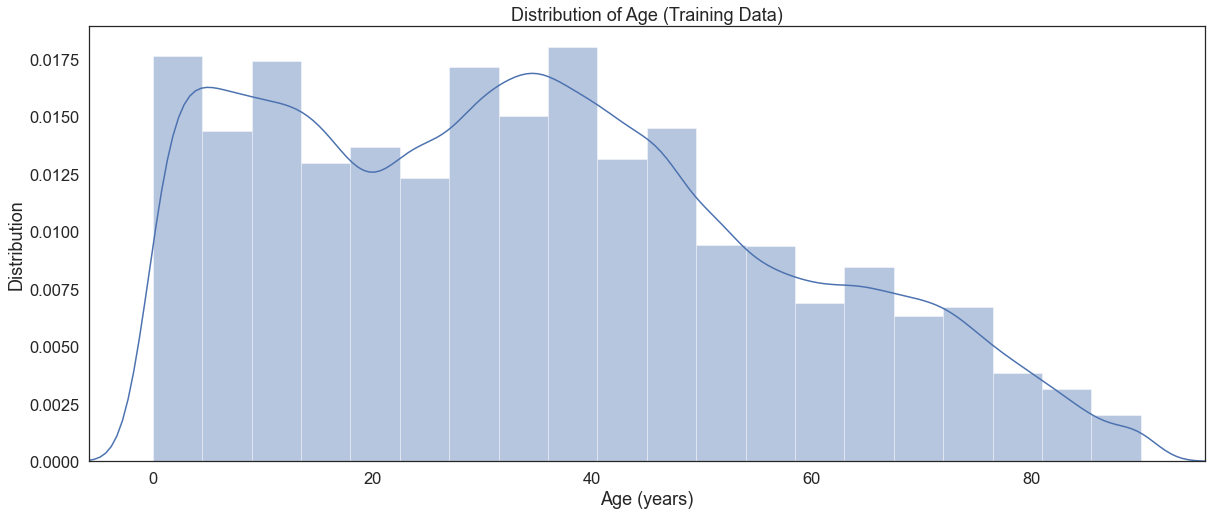

In [66]:
# Dsitribution of ages across the datset
sns.set_style('white')
sns.distplot(df['age'], bins=20)
plt.ylabel('Distribution')
plt.xlabel('Age (years)')
plt.title('Distribution of Age (Training Data)')
plt.margins(x=0)

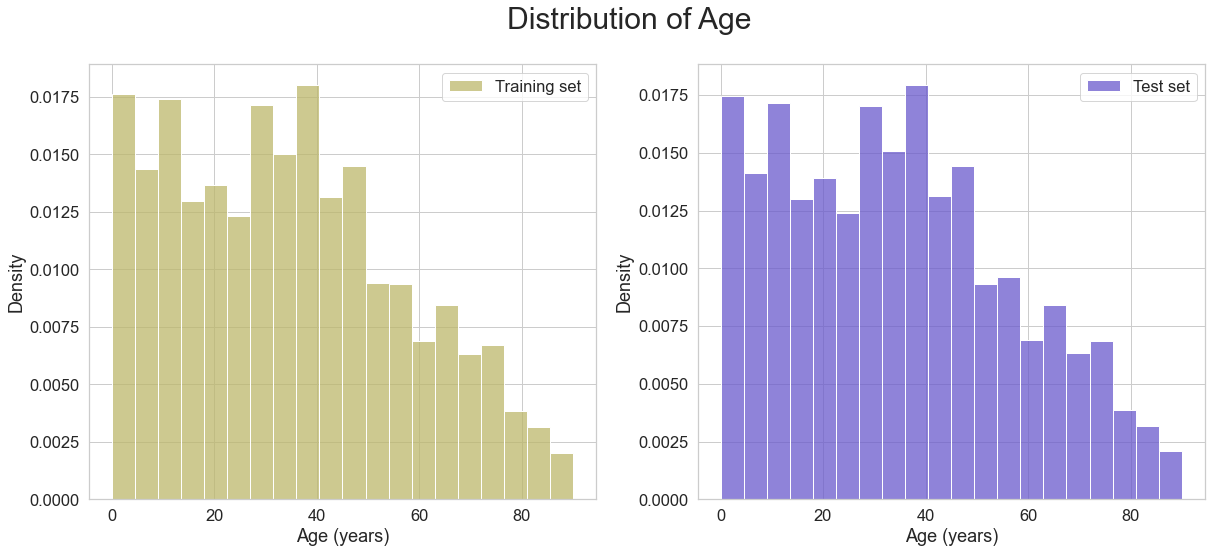

In [95]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font',size = 20)
fig, ax = plt.subplots(1,2)
fig.suptitle('Distribution of Age', fontsize= 30)

sns.set(font_scale=1.5)
#sns.set_style("whitegrid")
sns.set_palette('pastel')
sns.set_style('whitegrid')
# sns.set_palette('pastel')

sns.histplot(df['age'], bins = 20, color ='darkkhaki', ax= ax[0],stat= 'density', label='Training set') 
sns.histplot(df_test['age'], bins = 20, color = 'slateblue', ax= ax[1], stat = 'density', label='Test set')
ax[0].set_xlabel('Age (years)')
ax[1].set_xlabel('Age (years)')
ax[0].legend()
ax[1].legend()

In [68]:
labs = np.arange(len(plot_titles))
width = 0.45
fontsize = 20

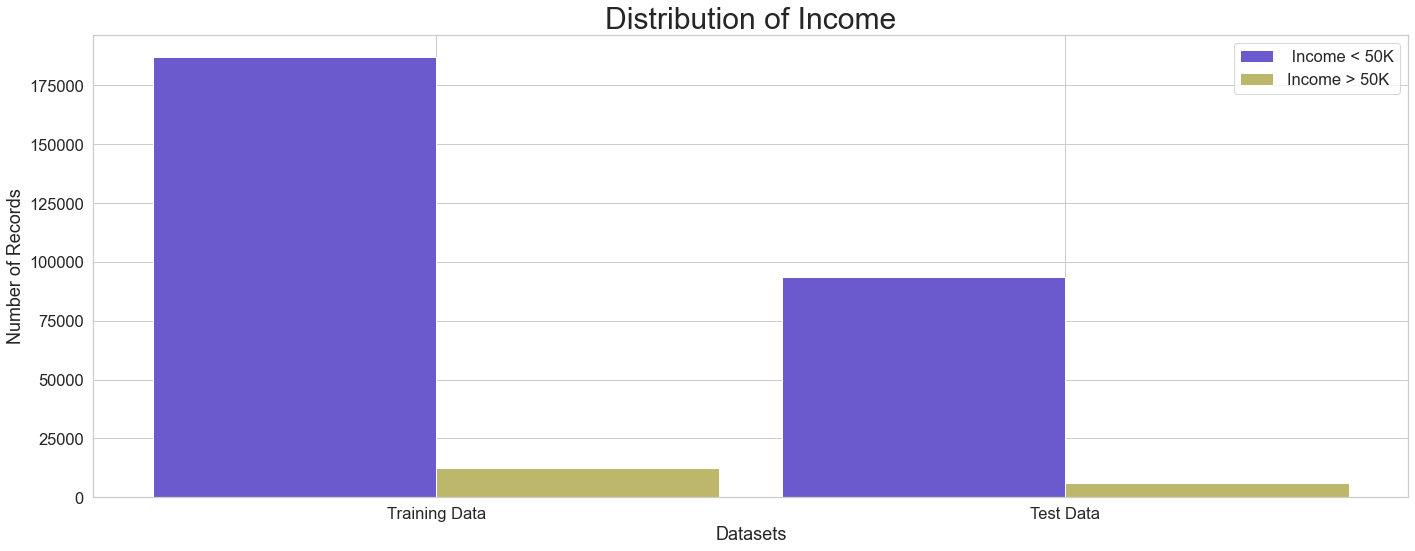

In [99]:
# Distribution of the target variable
sns.set_palette("pastel")

train_counts=y_train.value_counts()
test_counts= y_test.value_counts()

zero= [train_counts[0],test_counts[0]]
ones = [train_counts[1],test_counts[1]]

fig, ax = plt.subplots()
rects1 = ax.bar(labs - width/2, zero, width, label=' Income < 50K', color=['slateblue', 'slateblue'])
rects2 = ax.bar(labs + width/2, ones, width, label='Income > 50K', color=['darkkhaki', 'darkkhaki'])
ax.set_xticks(labs)
ax.set_xticklabels(plot_titles)
ax.set_ylabel('Number of Records')
ax.set_xlabel('Datasets')
ax.set_title('Distribution of Income', fontsize = 30)
ax.legend()
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()